<a href="https://colab.research.google.com/github/angemar02/DeepLearning/blob/master/Copia_de_TiemposSoloTaxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **MODELO DE ESTIMACIÓN DE TIEMPOS**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tiempos_python_cat.csv to tiempos_python_cat.csv
Saving tiempos_solo_taxis.csv to tiempos_solo_taxis.csv


### CARGA DE LIBRERIAS



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import os
from sklearn import preprocessing
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

###  LECTURA DE LA BASE DE DATOS

In [4]:
data = pd.read_csv('tiempos_solo_taxis.csv',decimal=",",delimiter=";",encoding="latin-1")
#data=data[(data['min_entrega'] < 150) & (data['min_entrega'] > 5) & (data['distancia_km'] > 0.005) & (data['distancia_km'] <= 20)]
data.head(5)

,mes,dia_mes,day,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega
0,6,9,sabado,4.605458,-74.099602,4.659650,-74.099785,9.50,20.000000
1,6,9,sabado,4.605474,-74.098488,4.604073,-74.085125,2.25,9.666667
2,6,9,sabado,4.694672,-74.096944,4.628049,-74.075541,10.06,18.750038
3,6,9,sabado,4.712187,-74.030484,4.742591,-74.057141,8.54,21.000000
4,6,9,sabado,4.703091,-74.115634,4.654036,-74.060834,10.41,32.000000


In [5]:
data.shape

(245232, 9)

In [6]:
data_test = pd.read_csv('tiempos_python_cat.csv',decimal=",",delimiter=";",encoding="latin-1")
data_test.head(5)

,mes,dia_mes,day,Franja,Bodega,MetodoDePago,Latitud_OGN,Longitud_OGN,Zona_OGN,Latitud_DST,Longitud_DST,Zona_DST,distancia_km,min_entrega
0,10,1,domingo,primera,Ferias,datafono,4.688093,-74.084569,Zona2,4.643890,-74.107783,Zona6,7.487995,63
1,10,1,domingo,primera,Ferias,datafono,4.656579,-74.112030,Zona6,4.670556,-74.123332,Zona6,2.806767,75
2,10,1,domingo,primera,Ferias,efectivo,4.670556,-74.123332,Zona6,4.673245,-74.118105,Zona6,0.878274,26
3,10,1,domingo,primera,Ferias,datafono,4.673245,-74.118105,Zona6,4.670514,-74.118844,Zona6,0.385607,46
4,10,1,domingo,primera,Ferias,efectivo,4.670514,-74.118844,Zona6,4.669219,-74.125305,Zona6,0.860045,11


In [7]:
data_test.shape

(371219, 14)

### **TIPO DE DATOS ACTUAL**

In [8]:
data.dtypes

mes               int64
dia_mes           int64
day              object
Latitud_OGN     float64
Longitud_OGN    float64
Latitud_DST     float64
Longitud_DST    float64
distancia_km    float64
min_entrega     float64
dtype: object

### **AJUSTE DEL TIPO DE DATOS**

In [0]:
data['mes']=data['mes'].astype('category')
data['dia_mes']=data['dia_mes'].astype('category')
data['day']=data['day'].astype('category')

data_test['mes']=data_test['mes'].astype('category')
data_test['dia_mes']=data_test['dia_mes'].astype('category')
data_test['day']=data_test['day'].astype('category')
#data['Bodega']=data['Bodega'].astype('category')
#data['MetodoDePago']=data['MetodoDePago'].astype('category')
#data['Zona_OGN']=data['Zona_OGN'].astype('category')
##data['Zona_DST']=data['Zona_DST'].astype('category')
#data['min_entrega']=data['min_entrega'].astype('float64')


data.dtypes

In [10]:
data.dtypes

mes             category
dia_mes         category
day             category
Latitud_OGN      float64
Longitud_OGN     float64
Latitud_DST      float64
Longitud_DST     float64
distancia_km     float64
min_entrega      float64
dtype: object

### **CORRELACIÓN VARIABLES NUMERICAS**

In [11]:
data.corr()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega
Latitud_OGN,1.000000,0.525182,0.113542,0.112138,-0.003843,-0.011136
Longitud_OGN,0.525182,1.000000,0.071570,0.186473,-0.015301,-0.023278
Latitud_DST,0.113542,0.071570,1.000000,-0.284987,-0.016003,0.003102
Longitud_DST,0.112138,0.186473,-0.284987,1.000000,-0.315821,-0.329092
distancia_km,-0.003843,-0.015301,-0.016003,-0.315821,1.000000,0.948206
min_entrega,-0.011136,-0.023278,0.003102,-0.329092,0.948206,1.000000


### **GENERACIÓN DE VARIABLES DUMMIES**

In [12]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega,mes_5,mes_6,mes_7,dia_mes_2,...,dia_mes_28,dia_mes_29,dia_mes_30,dia_mes_31,day_jueves,day_lunes,day_martes,day_miercoles,day_sabado,day_viernes
0,4.605458,-74.099602,4.659650,-74.099785,9.50,20.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.605474,-74.098488,4.604073,-74.085125,2.25,9.666667,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.694672,-74.096944,4.628049,-74.075541,10.06,18.750038,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.712187,-74.030484,4.742591,-74.057141,8.54,21.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.703091,-74.115634,4.654036,-74.060834,10.41,32.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
data_test_dum = pd.get_dummies(data_test, drop_first=True)
data_test_dum.head()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega,mes_2,mes_3,mes_4,mes_5,...,Zona_DST_Zona15,Zona_DST_Zona16,Zona_DST_Zona2,Zona_DST_Zona3,Zona_DST_Zona4,Zona_DST_Zona5,Zona_DST_Zona6,Zona_DST_Zona7,Zona_DST_Zona8,Zona_DST_Zona9
0,4.688093,-74.084569,4.643890,-74.107783,7.487995,63,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4.656579,-74.112030,4.670556,-74.123332,2.806767,75,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4.670556,-74.123332,4.673245,-74.118105,0.878274,26,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.673245,-74.118105,4.670514,-74.118844,0.385607,46,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.670514,-74.118844,4.669219,-74.125305,0.860045,11,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### **INDEXACION VARIABLES**

In [14]:
data_dum.columns

Index(['Latitud_OGN', 'Longitud_OGN', 'Latitud_DST', 'Longitud_DST',
       'distancia_km', 'min_entrega', 'mes_5', 'mes_6', 'mes_7', 'dia_mes_2',
       'dia_mes_3', 'dia_mes_4', 'dia_mes_5', 'dia_mes_6', 'dia_mes_7',
       'dia_mes_8', 'dia_mes_9', 'dia_mes_10', 'dia_mes_11', 'dia_mes_12',
       'dia_mes_13', 'dia_mes_14', 'dia_mes_15', 'dia_mes_16', 'dia_mes_17',
       'dia_mes_18', 'dia_mes_19', 'dia_mes_20', 'dia_mes_21', 'dia_mes_22',
       'dia_mes_23', 'dia_mes_24', 'dia_mes_25', 'dia_mes_26', 'dia_mes_27',
       'dia_mes_28', 'dia_mes_29', 'dia_mes_30', 'dia_mes_31', 'day_jueves',
       'day_lunes', 'day_martes', 'day_miercoles', 'day_sabado',
       'day_viernes'],
      dtype='object')

In [16]:
data_test_dum.columns

Index(['Latitud_OGN', 'Longitud_OGN', 'Latitud_DST', 'Longitud_DST',
       'distancia_km', 'min_entrega', 'mes_2', 'mes_3', 'mes_4', 'mes_5',
       'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12',
       'dia_mes_2', 'dia_mes_3', 'dia_mes_4', 'dia_mes_5', 'dia_mes_6',
       'dia_mes_7', 'dia_mes_8', 'dia_mes_9', 'dia_mes_10', 'dia_mes_11',
       'dia_mes_12', 'dia_mes_13', 'dia_mes_14', 'dia_mes_15', 'dia_mes_16',
       'dia_mes_17', 'dia_mes_18', 'dia_mes_19', 'dia_mes_20', 'dia_mes_21',
       'dia_mes_22', 'dia_mes_23', 'dia_mes_24', 'dia_mes_25', 'dia_mes_26',
       'dia_mes_27', 'dia_mes_28', 'dia_mes_29', 'dia_mes_30', 'dia_mes_31',
       'day_jueves', 'day_lunes', 'day_martes', 'day_miercoles', 'day_sabado',
       'day_viernes', 'Franja_primera', 'Franja_segunda', 'Franja_tercera',
       'Bodega_Montevideo', 'MetodoDePago_datafono', 'MetodoDePago_efectivo',
       'MetodoDePago_efectivo_datafono', 'Zona_OGN_Zona10', 'Zona_OGN_Zona11',
       'Zona_OGN_Z

### ** MATRIZ DE DISEÑO X** FULL

In [18]:
features=['Latitud_OGN', 'Longitud_OGN', 'Latitud_DST', 'Longitud_DST',
       'distancia_km', 'dia_mes_2',
       'dia_mes_3', 'dia_mes_4', 'dia_mes_5', 'dia_mes_6', 'dia_mes_7',
       'dia_mes_8', 'dia_mes_9', 'dia_mes_10', 'dia_mes_11', 'dia_mes_12',
       'dia_mes_13', 'dia_mes_14', 'dia_mes_15', 'dia_mes_16', 'dia_mes_17',
       'dia_mes_18', 'dia_mes_19', 'dia_mes_20', 'dia_mes_21', 'dia_mes_22',
       'dia_mes_23', 'dia_mes_24', 'dia_mes_25', 'dia_mes_26', 'dia_mes_27',
       'dia_mes_28', 'dia_mes_29', 'dia_mes_30', 'dia_mes_31', 'day_jueves',
       'day_lunes', 'day_martes', 'day_miercoles', 'day_sabado',
       'day_viernes']

X = data_dum[features]
X.head()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,dia_mes_2,dia_mes_3,dia_mes_4,dia_mes_5,dia_mes_6,...,dia_mes_28,dia_mes_29,dia_mes_30,dia_mes_31,day_jueves,day_lunes,day_martes,day_miercoles,day_sabado,day_viernes
0,4.605458,-74.099602,4.659650,-74.099785,9.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.605474,-74.098488,4.604073,-74.085125,2.25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.694672,-74.096944,4.628049,-74.075541,10.06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4.712187,-74.030484,4.742591,-74.057141,8.54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.703091,-74.115634,4.654036,-74.060834,10.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
Y = data_test_dum[features]
Y.head()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,dia_mes_2,dia_mes_3,dia_mes_4,dia_mes_5,dia_mes_6,...,dia_mes_28,dia_mes_29,dia_mes_30,dia_mes_31,day_jueves,day_lunes,day_martes,day_miercoles,day_sabado,day_viernes
0,4.688093,-74.084569,4.643890,-74.107783,7.487995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.656579,-74.112030,4.670556,-74.123332,2.806767,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.670556,-74.123332,4.673245,-74.118105,0.878274,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.673245,-74.118105,4.670514,-74.118844,0.385607,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.670514,-74.118844,4.669219,-74.125305,0.860045,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **VECTOR TARGET**

In [22]:

Y= data["min_entrega"]
Y.head()

0    20.000000
1     9.666667
2    18.750038
3    21.000000
4    32.000000
Name: min_entrega, dtype: float64

### **PARTICIÓN DEL SET DE DATOS EN ENTRENAMIENTO Y PRUEBA**

In [39]:
x_train = data_dum[features]
y_train = Y
x_test = data_test_dum[features]
y_test = data_test_dum["min_entrega"]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((245232, 41), (245232,), (371219, 41), (371219,))

### **ESCALAMIENTO DE LAS VARIABLES**

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaling    = MinMaxScaler(feature_range=(-1,1)).fit(x_train[0:4])

x_train = scaling.transform(x_train)
x_test  = scaling.transform(x_test)

### **CONJUNTO DE DATOS DE ENTRENAMIENTO Y PRUEBA ESCALADO POR EL METODO 1**

In [35]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-1.000000,-1.000000,-0.197548,-1.000000,0.856594,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.999702,-0.967780,-1.000000,-0.312421,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.671783,-0.923105,-0.653818,0.137026,1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.000000,1.000000,1.000000,1.000000,0.610755,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.829544,-1.463926,-0.278600,0.826788,1.089629,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [36]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.548502,-0.565013,-0.425102,-1.375117,0.341356,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0
1,-0.042051,-1.359630,-0.040081,-2.104363,-0.857422,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0
2,0.219874,-1.686664,-0.001252,-1.859232,-1.351274,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0
3,0.270268,-1.535425,-0.040692,-1.893878,-1.477437,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0
4,0.219080,-1.556800,-0.059392,-2.196896,-1.355942,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-3.0,-1.0


### **CONJUNTO DE DATOS DE ENTRENAMIENTO Y PRUEBA ESCALADO POR EL METODO 2**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(x_train)  # Don't cheat - fit only on training data
x_train.SM2 = scaler.transform(x_train)
x_test.SM2  = scaler.transform(x_test)  # apply same transformation to test data

AttributeError: ignored

In [0]:
pd.DataFrame(x_train.SM2).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.034395,0.784762,0.934957,-0.200575,1.355727,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,2.360179,-0.424293,-0.422844,-0.422722
1,0.436831,0.401142,-0.164878,-0.957685,1.652493,-0.213566,-0.211577,-0.224836,-0.342836,-0.796883,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,-0.423697,2.356861,-0.422844,-0.422722
2,0.197657,0.912107,0.613552,1.023002,0.225258,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,2.360179,-0.424293,-0.422844,-0.422722
3,1.501665,1.229533,1.313687,1.740896,-0.011625,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,2.330996,-0.381103,-0.423697,-0.424293,-0.422844,-0.422722
4,0.576001,1.228309,1.910868,1.316477,1.423743,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,2.360179,-0.424293,-0.422844,-0.422722


In [0]:
pd.DataFrame(x_test.SM2).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.656270,-1.423445,-0.206352,-0.636086,-0.215486,-0.213374,-0.207622,-0.223463,-0.34394,1.252243,...,-0.196076,5.349028,-0.161541,-0.136503,-0.428592,-0.381718,-0.424767,-0.423383,-0.422943,2.372313
1,-1.552155,-1.004186,-0.454502,-0.333287,-0.136367,-0.213374,-0.207622,-0.223463,-0.34394,-0.798567,...,-0.196076,-0.186950,-0.161541,-0.136503,2.333222,-0.381718,-0.424767,-0.423383,-0.422943,-0.421529
2,-0.970126,0.743758,-0.171674,-0.105493,0.127640,-0.213374,-0.207622,-0.223463,-0.34394,1.252243,...,-0.196076,-0.186950,-0.161541,-0.136503,-0.428592,-0.381718,2.354231,-0.423383,-0.422943,-0.421529
3,-0.429375,0.882702,0.244040,0.420094,0.227766,-0.213374,-0.207622,-0.223463,-0.34394,1.252243,...,-0.196076,-0.186950,-0.161541,-0.136503,2.333222,-0.381718,-0.424767,-0.423383,-0.422943,-0.421529
4,1.556437,1.038413,0.493754,0.352511,-0.115872,-0.213374,-0.207622,-0.223463,-0.34394,-0.798567,...,-0.196076,-0.186950,-0.161541,-0.136503,-0.428592,-0.381718,-0.424767,2.361930,-0.422943,-0.421529


### **MATRIZ  DE CORRELACIONES SOBRE LOS DATOS ESCALADOS MÉTODO 2*

In [0]:
pd.DataFrame(x_test.SM2).corr().head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.000000,0.547933,0.187931,0.165215,-0.009027,0.022623,0.013078,0.021043,-0.007713,-0.025253,...,-0.004831,0.000100,-0.002842,0.007303,-0.004069,0.013084,0.005292,-0.004289,-0.006281,-0.008245
1,0.547933,1.000000,0.111339,0.277734,0.022246,-0.024320,-0.033968,-0.010971,0.021890,0.161258,...,0.001181,0.003471,-0.013079,-0.002298,0.025514,-0.023045,0.010588,0.021042,-0.007720,0.021430
2,0.187931,0.111339,1.000000,-0.398403,-0.271283,0.004894,0.003003,-0.000352,0.005541,-0.007979,...,-0.000535,0.000746,0.000224,0.004655,0.003603,0.003498,0.003091,0.003045,-0.002236,-0.014125
3,0.165215,0.277734,-0.398403,1.000000,-0.169871,-0.005991,-0.008484,-0.001251,0.005535,0.044590,...,-0.003147,0.001152,-0.004065,-0.001275,0.005662,-0.006653,0.003347,0.002623,-0.001947,0.010707
4,-0.009027,0.022246,-0.271283,-0.169871,1.000000,-0.025795,-0.025025,-0.009520,0.015203,0.101332,...,0.003000,-0.000326,-0.005715,0.000869,0.015475,-0.018402,-0.003018,0.006251,0.005784,0.013715


### **RANDOM FOREST E IMPORTANCIA DE VARIABLES**


### **PRUEBA DE CV DE RANDOM FOREST**

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 18, 32, 46, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 10],
 'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200]}


In [43]:
import tqdm
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True 
[CV] n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True, total= 1.8min
[CV] n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True, total= 1.9min
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True, total= 1.8min
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstr

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 19.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 18, 32, 46, 60, None], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [44]:
rf_random.best_params_


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 113}

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf.calibrate = RandomForestRegressor(max_depth=None, 
                           random_state=41,
                           n_estimators=113,
                           max_features= "auto",
                           min_samples_leaf= 4,
                           min_samples_split= 10,
                           bootstrap=True)

rf.calibrate.fit(x_train, y_train)
pred=rf.calibrate.predict(x_test)



Text(0.5,0,'Importancia Relativa')

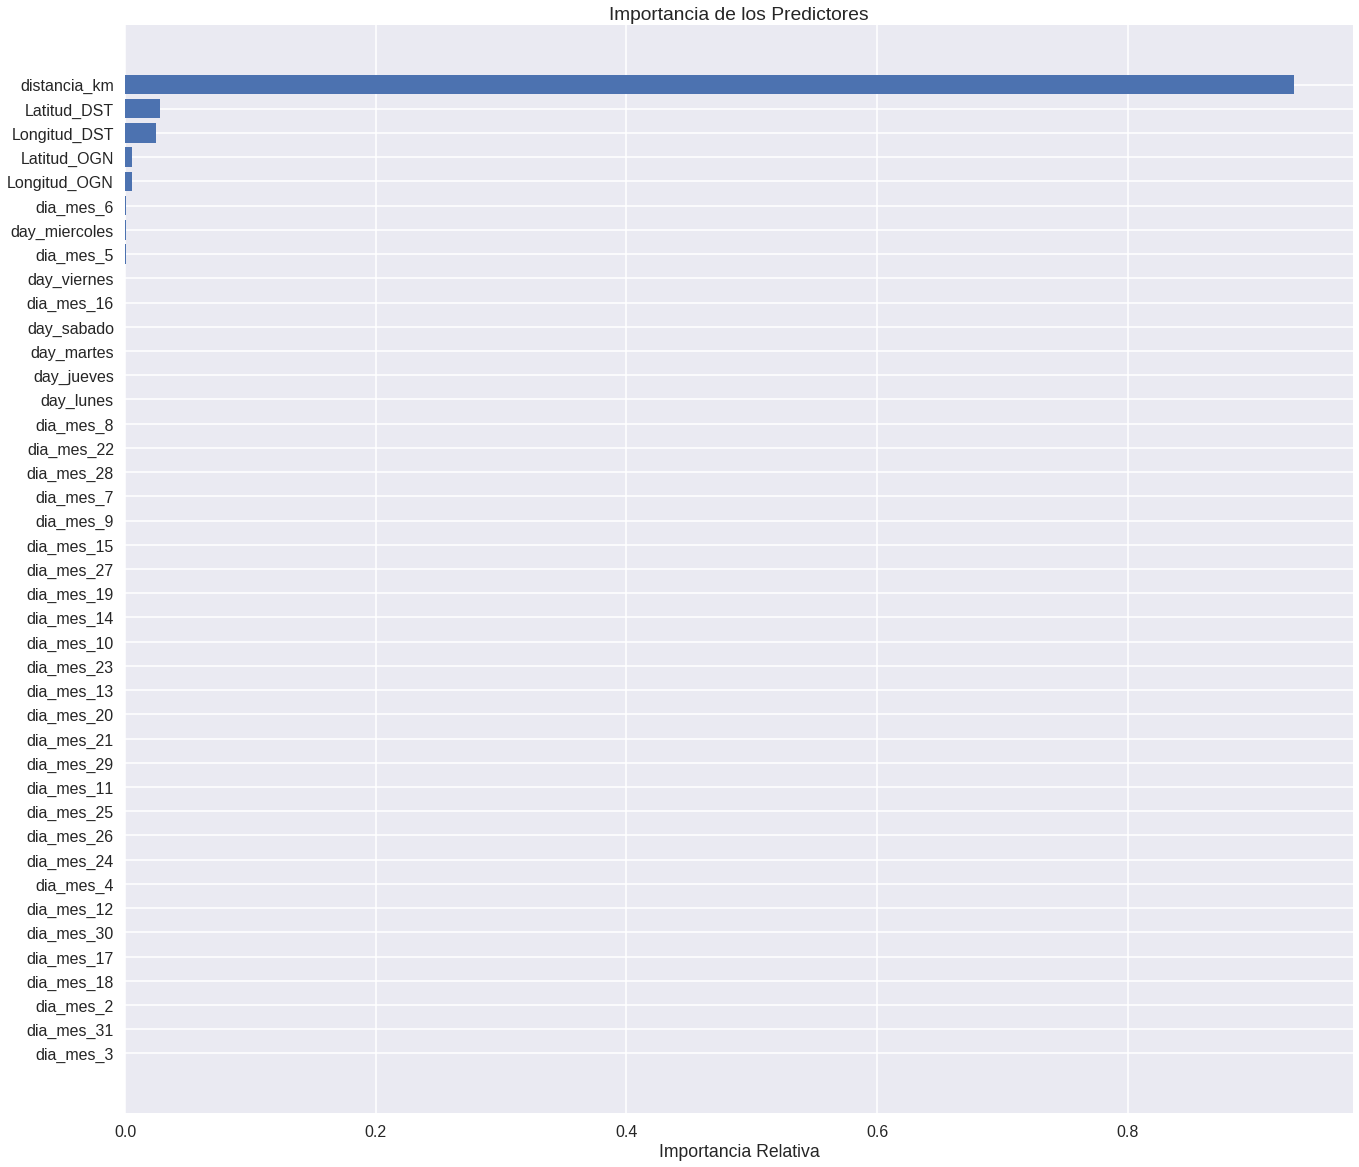

In [46]:
# Almacenamiento de la importancia de los predictores.
importances = rf.calibrate.feature_importances_
indices = np.argsort(importances)

# Gráfico de importancia de los predictores.
#plt.figure(1)

plt.figure(figsize=(22,20))
plt.title('Importancia de los Predictores')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
mean_squared_error(pred,y_test),r2_score(y_test,pred),(np.sqrt(mean_squared_error(y_test, pred)))

(1092.6797445325626, -0.4869155696059111, 33.05570668632819)

### **DICCIONARIO CON MODELOS**

In [0]:
import time
from tqdm import *
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



#GradientBoosting parámetros
params = {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

#adaBoost parámetros
ada_tree_backing = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3)
 

models = {'lasso': lm.Lasso(alpha = 0.1),
          'ridge': lm.Ridge (alpha = .5),
          'linear':lm.LinearRegression(),
          'rf':RandomForestRegressor(max_depth=6, random_state=0,
                                     n_estimators=20,
                                     max_features='sqrt',n_jobs=-1),
          "svr" : LinearSVR(random_state=0, tol=1e-5),
          "lassoLars":lm.LassoLars(alpha=.1),
          "bayridge" : lm.BayesianRidge(),
          "gra.Boosting":GradientBoostingRegressor(**params),
          "BagRegr":BaggingRegressor(n_estimators=20,random_state=0),
          "AdaBoost":AdaBoostRegressor(ada_tree_backing, learning_rate=0.1, loss='square', n_estimators=20)
          #"svr_rbf" : SVR(kernel='rbf', C=1e3, gamma=0.1),
          #"svr_lin" : SVR(kernel='linear', C=1e3),
          #"svr_poly" : SVR(kernel='poly', C=1e3, degree=2)
    
         }

In [56]:
for model in tqdm(models.keys()):
   models[model].fit(x_train, y_train)

100%|██████████| 10/10 [03:54<00:00, 24.97s/it]


In [57]:
y_pred = pd.DataFrame(index=pd.DataFrame(x_test).index, columns=models.keys())
for model in tqdm(models.keys()):
   y_pred[model] = models[model].predict(x_test)

100%|██████████| 10/10 [00:06<00:00,  1.18s/it]


In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

for model in models.keys():
    print(model,'MAE',mean_absolute_error(y_test,y_pred[model]))
    print(model,'MSE',mean_squared_error(y_test,y_pred[model]))
    print(model,'R2S',r2_score(y_test,y_pred[model]))


lasso MAE 15.474684785680257
lasso MSE 858.4380824714119
lasso R2S -0.16816016472916973
ridge MAE 15.54924856709942
ridge MSE 861.5047403089641
ridge R2S -0.172333264219781
linear MAE 15.549256815140287
linear MSE 861.5049681438347
linear R2S -0.17233357425684193
rf MAE 14.769175139097309
rf MSE 779.7752051231184
rf R2S -0.061115939132021735
svr MAE 18.03644146447958
svr MSE 979.8050730582869
svr R2S -0.3333160293297701
lassoLars MAE 15.133406421558652
lassoLars MSE 753.8228667642641
lassoLars R2S -0.025800068982008817
bayridge MAE 15.545223734234728
bayridge MSE 861.393651291228
bayridge R2S -0.1721820945921657
gra.Boosting MAE 14.67698286938453
gra.Boosting MSE 770.5349513824093
gra.Boosting R2S -0.04854182743743074
BagRegr MAE 20.91473728110738
BagRegr MSE 1092.487844917898
BagRegr R2S -0.48665443314184254
AdaBoost MAE 15.259378863187445
AdaBoost MSE 749.0163863333278
AdaBoost R2S -0.019259423725678237


### **CALIBRACIÓN MODELO RIDGE  VÍA VALIDACIÓN CRUZADA**

In [0]:
alphas     = np.arange(0.001,10,0.01) 
regRidgeCV = lm.RidgeCV(alphas=alphas , cv=5)


In [0]:
regRidgeCV.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [0]:
 regRidgeCV.alpha_

AttributeError: ignored

In [0]:
model_Ridge= lm.Ridge (alpha =regRidgeCV.alpha_,fit_intercept=True,max_iter=3000,)

AttributeError: ignored

In [0]:
model_Ridge.fit(x_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
predRidge=model_Ridge.predict(X=x_test)
predRidge

array([17., 14., 27., ..., 16., 18., 48.])

In [0]:
 print(model_Ridge,'MAE',mean_absolute_error(y_test,predRidge))
 print(model_Ridge,'MSE',mean_squared_error(y_test,predRidge))
 print(model_Ridge,'R2S',r2_score(y_test,predRidge))

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001) MAE 8.581430272772022e-11
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001) MSE 1.885879903668744e-20
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2S 1.0


In [0]:
import time
from tqdm import *

mridge = lm.Ridge()


errors = []

for a in tqdm(alphas):
    mridge.set_params(alpha=a)
    mridge.fit(x_train, y_train)
    coefs.append(mridge.coef_)
    predict= mridge.predict(x_test)
    errors.append(mean_squared_error(y_test,predict))

plt.figure(figsize=(20, 6))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]


NameError: ignored

### **CALIBRACIÓN MODELO ADABOOST REGRESSOR VÍA VALIDACIÓN CRUZADA**

In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [30,50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }


In [0]:
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = param_dist,cv=3,n_iter = 10)

In [0]:
pre_gs_inst.fit(x_train, y_train)

In [0]:
pre_gs_inst.best_params_

In [0]:
ada_calibrate = AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=30, random_state=1456)

In [0]:
ada_calibrate.fit(x_train, y_train)

In [0]:
pred_ada = ada_calibrate.predict(x_test)

In [0]:
# Almacenamiento de la importancia de los predictores.
importances = ada_calibrate.feature_importances_
indices = np.argsort(importances)

# Gráfico de importancia de los predictores.
#plt.figure(1)

plt.figure(figsize=(22,20))
plt.title('Importancia de los Predictores')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
mean_squared_error(pred_ada,y_test),r2_score(y_test,pred_ada),(np.sqrt(mean_squared_error(y_test, pred_ada)))

### **CALIBRACIÓN MODELO LINEAR SVR  REGRESSOR VÍA VALIDACIÓN CRUZADA**

In [0]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_SVR = {
"C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
"epsilon":[0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
"loss":['squared_epsilon_insensitive','epsilon_insensitive']
#"max_iter":[100,500,1000,1500,2000],
#"fit_intercept":[True,False]
#"dual":[True,False]
}


In [0]:
estimator = LinearSVR(random_state=12)

In [0]:
gridsearch = GridSearchCV(estimator,param_SVR,scoring="r2",n_jobs=-1,cv=2,verbose=2)

In [0]:
gridsearch.fit(x_train,y_train)

In [0]:
gridsearch.best_params_

In [0]:
 SVR_calibrate = LinearSVR(C=0.01,epsilon=0.0001,random_state=0, tol=1e-5,loss='squared_epsilon_insensitive',fit_intercept=False,dual=True,max_iter :2000)

In [0]:
 SVR_calibrate.fit(x_train, y_train)

In [0]:
 predSVR=SVR_calibrate.predict(x_test)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
mean_squared_error( predSVR,y_test),r2_score(y_test, predSVR),(np.sqrt(mean_squared_error(y_test,  predSVR)))

### ** SALVADO DEL MODELO**

In [0]:
from sklearn.externals import joblib
filename = 'rf.calibrate.pkl'
joblib.dump(rf.calibrate, filename)


In [0]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)